In [1]:
import numpy as np 
import matplotlib.pylab as plt
%matplotlib inline
from rubin_sim.site_models import (
    ScheduledDowntimeData,
    UnscheduledDowntimeData,
    SeeingData,
    SeeingModel,
    CloudData,
    Almanac,
)

from rubin_sim.utils import (
    survey_start_mjd,
)
from astropy.time import Time


In [2]:

mjd_start = survey_start_mjd() 
mjd_start_time = Time(mjd_start, format="mjd")
# Downtime
down_nights = []
sched_downtime_data = ScheduledDowntimeData(mjd_start_time)
unsched_downtime_data = UnscheduledDowntimeData(mjd_start_time)

sched_downtimes = sched_downtime_data()
unsched_downtimes = unsched_downtime_data()

In [3]:
seeing_data = SeeingData(mjd_start_time, seeing_db=None)
cloud_data = CloudData(mjd_start_time, offset_year=0)

In [4]:
mjd_start

60218.0

In [5]:
mjds = mjd_start + np.arange(0,3650, 0.1)
mjds_time = Time(mjds, format="mjd")

In [6]:
seeing = seeing_data(mjds_time)
clouds = cloud_data(mjds_time)

/Users/yoachim/anaconda3/envs/guro/lib/python3.8/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 24630 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


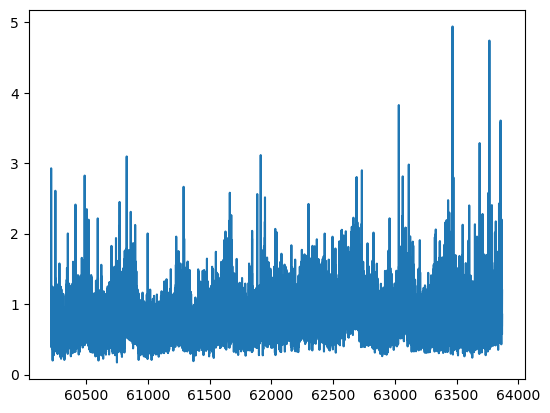

In [7]:
plt.plot(mjds, seeing)

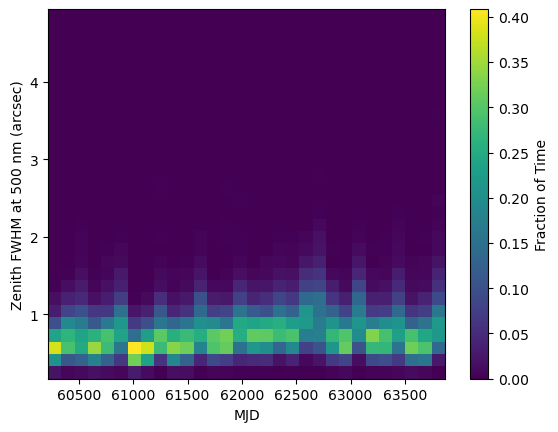

In [8]:
fig, ax = plt.subplots()
xbins = 30


h = ax.hist2d(mjds, seeing, bins=30, weights=seeing*0+1./seeing.size*xbins)
cb = plt.colorbar(h[3], ax=ax)
ax.set_ylabel('Zenith FWHM at 500 nm (arcsec)')
ax.set_xlabel('MJD')
cb.set_label('Fraction of Time')
fig.savefig('seeing_over_time.pdf')

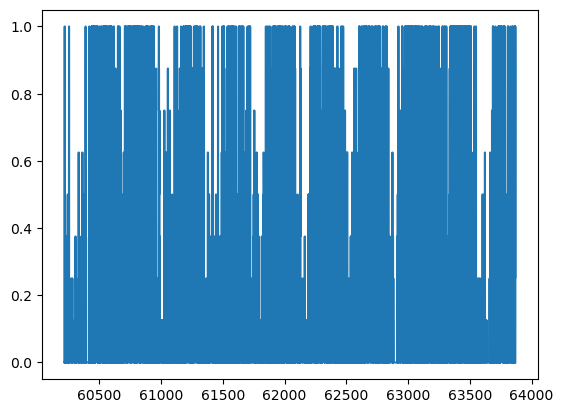

In [9]:
plt.plot(mjds, clouds)

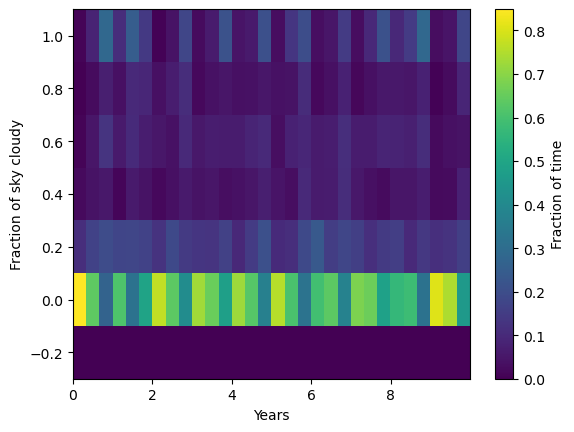

In [10]:
fig, ax = plt.subplots()
xbins = 30
h = ax.hist2d((mjds-np.min(mjds))/365.25, clouds,
              bins=[xbins, np.arange(-0.3, 1.2, .2)],
              weights=clouds*0+1./clouds.size*xbins)
cb = plt.colorbar(h[3], ax=ax)
ax.set_xlabel('Years')
ax.set_ylabel('Fraction of sky cloudy')
cb.set_label('Fraction of time')
fig.savefig('cloudy_over_time.pdf')

In [11]:
# What fraction of the time is cloudy?
np.where(clouds > 0.3)[0].size/clouds.size

0.27835616438356164

total scheduled downtime =  147.0
total un scheduled downtime =  151.0


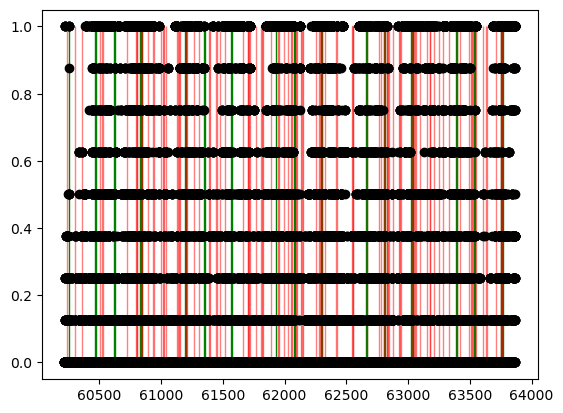

In [12]:

# I guess make this running means of the seeing and/or cloud fraction with downtime marked as well?

fig, ax = plt.subplots()



ax.plot(mjds, clouds, 'ko')

#ax.fill_between([61000, 61500], 0, 1)

tot_sched = 0
tot_un = 0
counter = 0
for dt in sched_downtimes:
    if (dt[1].mjd < mjds.max()) & (dt[0].mjd > mjds.min()):
    
        xs = np.where((mjds >= dt[0].mjd) & (mjds <= dt[1].mjd))[0]
        ax.fill_between(mjds[xs], 0, 1, color='green')
        tot_sched += dt[1].mjd-dt[0].mjd
        counter += 1
        
for dt in unsched_downtimes:
    if (dt[1].mjd < mjds.max()) & (dt[0].mjd > mjds.min()):
    
        xs = np.where((mjds >= dt[0].mjd) & (mjds <= dt[1].mjd))[0]
        ax.fill_between(mjds[xs], 0, 1, color='red', alpha=0.5)
        tot_un += dt[1].mjd-dt[0].mjd
        
print('total scheduled downtime = ', tot_sched)
print('total un scheduled downtime = ', tot_un)


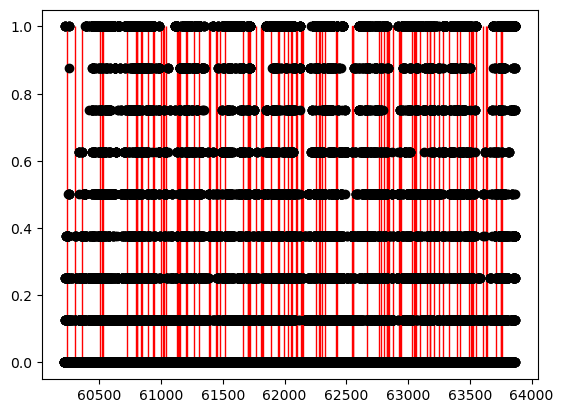

In [13]:
fig, ax = plt.subplots()



ax.plot(mjds, clouds, 'ko')

#ax.fill_between([61000, 61500], 0, 1)

for dt in unsched_downtimes:
    if (dt[1].mjd < mjds.max()) & (dt[0].mjd > mjds.min()):
    
        xs = np.where((mjds >= dt[0].mjd) & (mjds <= dt[1].mjd))[0]
        ax.fill_between(mjds[xs], 0, 1, color='red')

In [14]:
sched_downtimes[1][0].mjd, sched_downtimes[1][1].mjd

(60251.66, 60258.66)